# Summer 2025 UCLA Extension 450.2

Keane Gonzalez

# Introduction

# Problem
1. What features affect life expectancy the most?

2. How does life expectancy affect national level statistics

3. ???


# Imports

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot


import os

import seaborn as sns

## Dataset Import

In [2]:
!pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kumarajarshi/life-expectancy-who")

print("Path to dataset files:", path)

Path to dataset files: /home/kgonzalez/.cache/kagglehub/datasets/kumarajarshi/life-expectancy-who/versions/1


In [3]:
csv_file = './life_expectancy_data.csv' #copied and renamed to our folder
if (os.path.exists(csv_file) is True):
    print(f'Found the input file')

Found the input file


# DEFINITIONS

In [4]:
!ls -lart

total 984
-rw-rw-r-- 1 kgonzalez kgonzalez 333442 Sep 27  2019 'Life Expectancy Data.csv'
drwxrwxr-x 4 kgonzalez kgonzalez   4096 Aug 14 11:01  ..
-rw-rw-r-- 1 kgonzalez kgonzalez 121472 Aug 14 11:01  archive.zip
drwxrwxr-x 2 kgonzalez kgonzalez   4096 Aug 14 11:05  .ipynb_checkpoints
-rw-rw-r-- 1 kgonzalez kgonzalez 333442 Aug 14 11:06  life_expectancy_data.csv
-rw-rw-r-- 1 kgonzalez kgonzalez 199187 Aug 15 17:43  FinalProject_KeaneGonzalez.ipynb
drwxrwxr-x 3 kgonzalez kgonzalez   4096 Aug 15 17:43  .


In [5]:
path

'/home/kgonzalez/.cache/kagglehub/datasets/kumarajarshi/life-expectancy-who/versions/1'

In [6]:
!ls '/home/jovyan/.cache/kagglehub/datasets/kumarajarshi/life-expectancy-who/versions/1'

ls: cannot access '/home/jovyan/.cache/kagglehub/datasets/kumarajarshi/life-expectancy-who/versions/1': No such file or directory


## Read CSV Data

In [7]:
who_df=pd.read_csv(csv_file)

## Describe the new dataframe contents

In [8]:
who_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [9]:
who_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [10]:
who_df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

## Prepare the data

### Look for any missing numerical data

In [11]:
nan_counts = who_df.isnull().sum()
print(nan_counts)

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [12]:
print(type(nan_counts))

<class 'pandas.core.series.Series'>


### Repair any missing numerical data

In [13]:
#loop over each column and replace missing data with its mean value for that column
column_list=who_df.columns.tolist()

nan_counts =who_df.isnull().sum()
print(f'Number of empty entries found (total) in dataset is {nan_counts}')

for counter, colname in enumerate(column_list):
    # Check to see if this is a numeric column
    if pd.api.types.is_numeric_dtype(who_df[colname]):
        print(f"Column '{colname}': {who_df[colname].dtype}")

        #
        # Replace any missing values with the mean of this column
        #

        who_df[colname] = who_df[colname].fillna(who_df[colname].mean())
        #df['A'] = df['A'].fillna(df['A'].mean())

nan_counts = who_df.isnull().sum()
print(f'After missing data correction, we have missing entries\n {nan_counts}')


Number of empty entries found (total) in dataset is Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64
Column 'Year': int64
Column 'Life expectancy ': float64
Column 'Adult Mortali

### Look for missing categorical data

### Find categorical columns

In [14]:
#
# Find all of the columns that are not numeric (usually object)
#
object_list =who_df.select_dtypes(include=['object']).columns
print(f'Columns with object dtype are:\n {object_list}')



Columns with object dtype are:
 Index(['Country', 'Status'], dtype='object')


In [15]:
object_list=[]
for col in who_df.columns:
    is_categorical =pd.api.types.is_object_dtype(who_df[col].dtype)  # pd.api.types.is_categorical_dtype(who_df[col].dtype) or 
    if (is_categorical is True):
        print(f'Column {col} is non-numeric')
        object_list.append(col)

print(f'Columns that are non-numeric: {object_list}')

Column Country is non-numeric
Column Status is non-numeric
Columns that are non-numeric: ['Country', 'Status']


In [16]:
if (len(object_list) > 1): #we found some entries that we need to check
    #look for empty values or empty strings
    for col in object_list:
        nulls = who_df[col].isnull
        print(f'\n\n# of null values found for {col} is: \n\n{nulls}')



# of null values found for Country is: 

<bound method Series.isnull of 0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
2933       Zimbabwe
2934       Zimbabwe
2935       Zimbabwe
2936       Zimbabwe
2937       Zimbabwe
Name: Country, Length: 2938, dtype: object>


# of null values found for Status is: 

<bound method Series.isnull of 0       Developing
1       Developing
2       Developing
3       Developing
4       Developing
           ...    
2933    Developing
2934    Developing
2935    Developing
2936    Developing
2937    Developing
Name: Status, Length: 2938, dtype: object>


In [17]:
#
# Replace any missing data with its neighbor
#
who_df.select_dtypes(include=['object']).columns


Index(['Country', 'Status'], dtype='object')

In [18]:
# 2. Empty strings ('')
#is_empty_string = (series == '')

# 3. Strings containing only whitespace
# We use .str.isspace() to check if a string consists of only whitespace characters.
# The or operator with an empty string check is important because .str.isspace() returns False for empty strings.
# We apply this to the series that are not already identified as missing by isna() to avoid errors on non-string types.
#is_whitespace = series.astype(str).str.isspace()

### Look for all spaces 

In [19]:
#
#   DEBUG ONLY!!!!!!!!
#
#



#add a fake space to test out the fix for spaces
who_df.loc[0,object_list[0]] ='   '
print(who_df.loc[0,object_list[0]] )

In [20]:

for col in object_list:
    space_found = who_df[col].str.isspace()
    if (space_found.sum() > 0): # there is a true value, meaning a positive finding for an entry of value ' '
        print(f'Found an entry with spaces in {col}')
        



Found an entry with spaces in Country


In [21]:
spaces = who_df[object_list[0]].str.isspace()
#rows that are spaces will show up as true in the series, so sum those to get how many failed 

print(spaces)
print(type(spaces))

0        True
1       False
2       False
3       False
4       False
        ...  
2933    False
2934    False
2935    False
2936    False
2937    False
Name: Country, Length: 2938, dtype: bool
<class 'pandas.core.series.Series'>


In [22]:
print(f'value>>{who_df['Country'][0]}<<')
who_df['Country'].str.isspace()

value>>   <<


0        True
1       False
2       False
3       False
4       False
        ...  
2933    False
2934    False
2935    False
2936    False
2937    False
Name: Country, Length: 2938, dtype: bool

### Repair entries with just spaces
If the questionable entry is surrounded by two of the same values, copy that value into its spot

In [23]:
who_df.loc[spaces, 'Country'] = np.nan
who_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,NaN,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [24]:
def repair_spaces(missing_series):
    missing_series is True



    return

In [25]:
data = {
    'product_id': [101, 102, 103, 104, 105],
    'product_name': ['Keyboard', 'Mouse', 'Monitor', 'Speakers', 'Webcam']
}

df = pd.DataFrame(data)
df

,product_id,product_name
0,101,Keyboard
1,102,Mouse
2,103,Monitor
3,104,Speakers
4,105,Webcam


In [26]:
df.loc[2, 'product_name'] = ' '
df

,product_id,product_name
0,101,Keyboard
1,102,Mouse
2,103,
3,104,Speakers
4,105,Webcam


## Statistics

In [33]:
#
# Get only the features that are numeric, for later analysis
#
number_columns_list = who_df.select_dtypes(include='number').columns.tolist()
print(f'Feature columns with numeric data:\n {number_columns_list}')

Feature columns with numeric data:
 ['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [31]:
correlation = who_df[number_columns_list].corr() #save the 
correlation

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.169623,-0.078861,-0.037415,-0.048168,0.031400,0.089398,-0.082493,0.108327,-0.042937,0.093820,0.081860,0.133853,-0.139741,0.093351,0.014951,-0.047592,-0.050627,0.236333,0.203471
Life expectancy,0.169623,1.000000,-0.696359,-0.196535,0.391598,0.381791,0.203771,-0.157574,0.559255,-0.222503,0.461574,0.207981,0.475418,-0.556457,0.430493,-0.019638,-0.472162,-0.466629,0.692483,0.715066
Adult Mortality,-0.078861,-0.696359,1.000000,0.078747,-0.190408,-0.242814,-0.138591,0.031174,-0.381449,0.094135,-0.272694,-0.110875,-0.273014,0.523727,-0.277053,-0.012501,0.299863,0.305366,-0.440062,-0.435108
infant deaths,-0.037415,-0.196535,0.078747,1.000000,-0.113812,-0.085612,-0.178783,0.501128,-0.227220,0.996629,-0.170674,-0.126564,-0.175156,0.025231,-0.107109,0.548522,0.465590,0.471228,-0.143663,-0.191757
Alcohol,-0.048168,0.391598,-0.190408,-0.113812,1.000000,0.339634,0.075447,-0.051055,0.318070,-0.110777,0.213744,0.294898,0.215242,-0.048650,0.318591,-0.030765,-0.416946,-0.405881,0.416099,0.497546
percentage expenditure,0.031400,0.381791,-0.242814,-0.085612,0.339634,1.000000,0.011679,-0.056596,0.228537,-0.087852,0.147203,0.173414,0.143570,-0.097857,0.888140,-0.024648,-0.251190,-0.252725,0.380374,0.388105
Hepatitis B,0.089398,0.203771,-0.138591,-0.178783,0.075447,0.011679,1.000000,-0.090317,0.134929,-0.184413,0.408519,0.050084,0.499958,-0.102405,0.062318,-0.109811,-0.105144,-0.108334,0.150992,0.171755
Measles,-0.082493,-0.157574,0.031174,0.501128,-0.051055,-0.056596,-0.090317,1.000000,-0.175925,0.507809,-0.136146,-0.104569,-0.141861,0.030899,-0.068060,0.236250,0.224742,0.221007,-0.115764,-0.122609
BMI,0.108327,0.559255,-0.381449,-0.227220,0.318070,0.228537,0.134929,-0.175925,1.000000,-0.237586,0.282156,0.231814,0.281059,-0.243548,0.276645,-0.063238,-0.532025,-0.538911,0.479837,0.508105
under-five deaths,-0.042937,-0.222503,0.094135,0.996629,-0.110777,-0.087852,-0.184413,0.507809,-0.237586,1.000000,-0.188703,-0.128269,-0.195651,0.038062,-0.110640,0.535864,0.467626,0.472099,-0.161533,-0.207111


In [35]:
correlation.unstack().sort_values().drop_duplicates()

Life expectancy         Adult Mortality                   -0.696359
                         HIV/AIDS                         -0.556457
 thinness 5-9 years      BMI                              -0.538911
 BMI                     thinness  1-19 years             -0.532025
 thinness  1-19 years   Life expectancy                   -0.472162
                                                             ...   
Schooling               Income composition of resources    0.796207
percentage expenditure  GDP                                0.888140
 thinness  1-19 years    thinness 5-9 years                0.939102
under-five deaths       infant deaths                      0.996629
Alcohol                 Alcohol                            1.000000
Length: 191, dtype: float64

<Axes: >

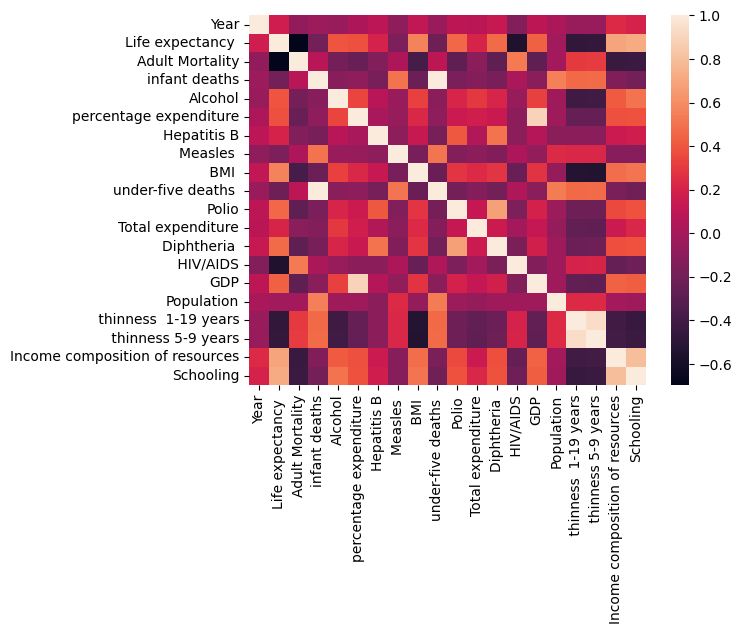

In [29]:
sns.heatmap(who_df[number_columns_list].corr())

## Histograms 

20 5
Year


"\n# Create a figure and a 2x2 grid of subplots\nfig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))\n\n# Flatten the axes array for easier iteration if needed\naxes_flat = axes.flatten()\n\n# Plot histograms on each subplot\naxes_flat[0].hist(data1, bins=30, color='skyblue', edgecolor='black')\naxes_flat[0].set_title('Histogram of Data 1')\n\naxes_flat[1].hist(data2, bins=30, color='lightcoral', edgecolor='black')\naxes_flat[1].set_title('Histogram of Data 2')\n\naxes_flat[2].hist(data3, bins=30, color='lightgreen', edgecolor='black')\naxes_flat[2].set_title('Histogram of Data 3')\n\naxes_flat[3].hist(data4, bins=30, color='gold', edgecolor='black')\naxes_flat[3].set_title('Histogram of Data 4')\n\n# Adjust layout to prevent titles/labels from overlapping\nplt.tight_layout()\n\n# Display the plot\nplt.show()\n\n\nfor counter,col in enumerate(number_columns_list):\n    plot.figure()\n    who_df[col].hist()\n"

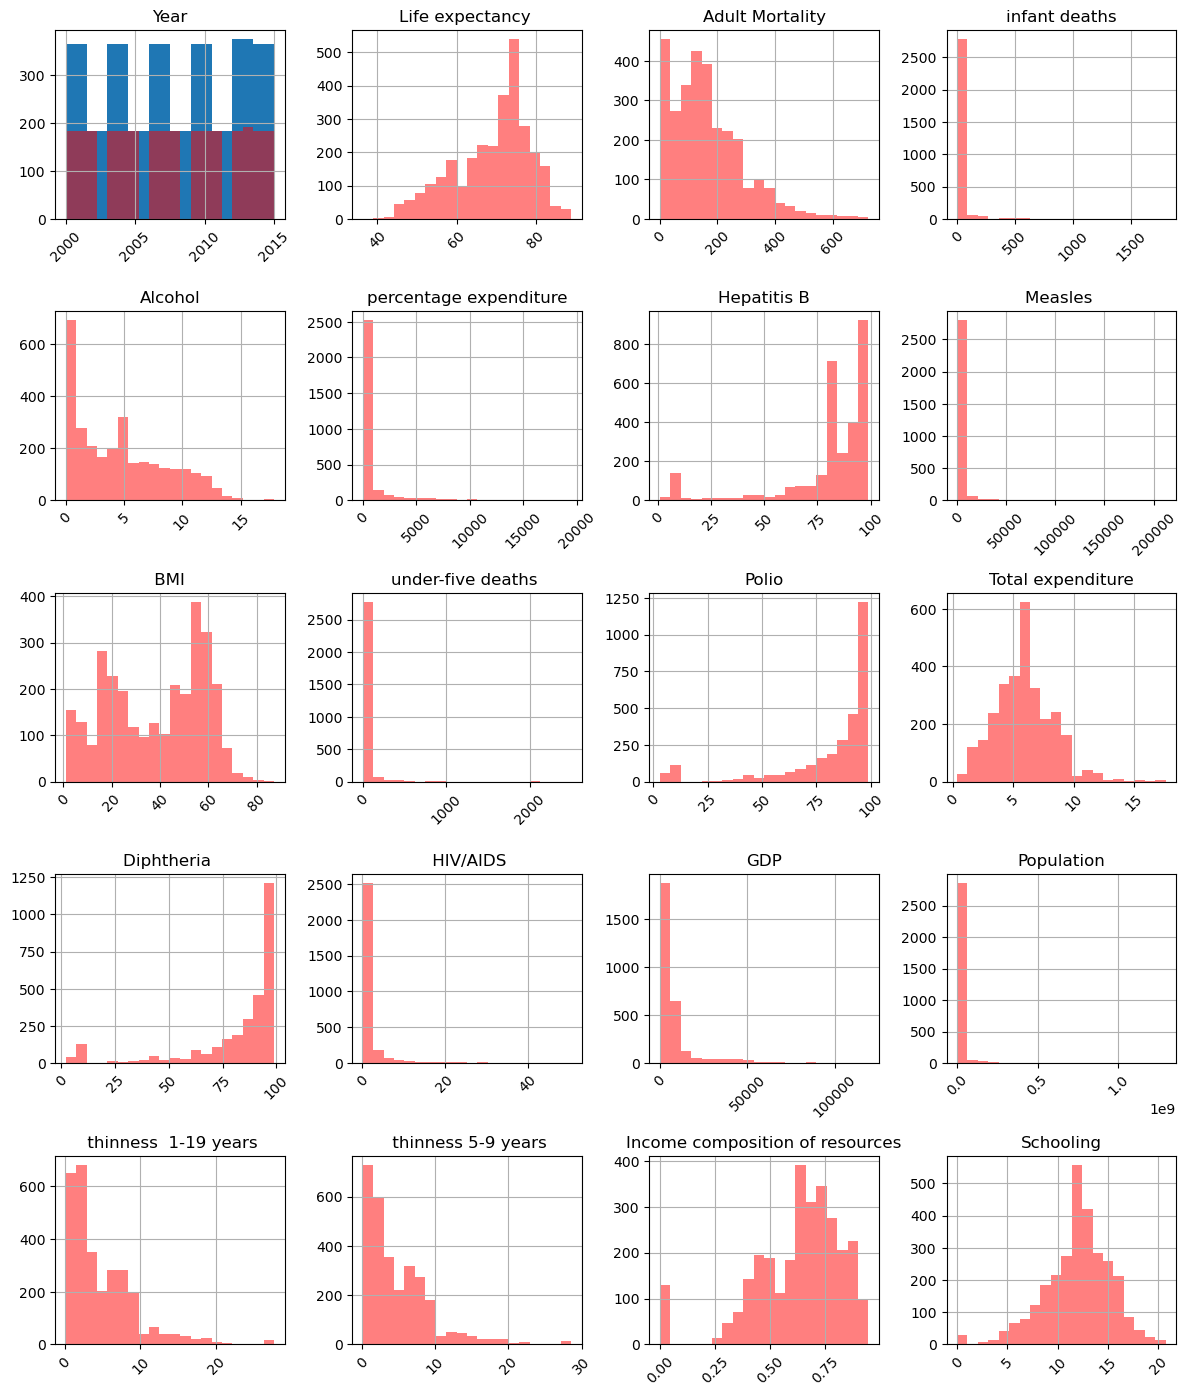

In [82]:
#who_df[number_columns_list].hist()
num_columns = len(number_columns_list)

figure_rows = np.uint16(np.floor(num_columns/4) + np.ceil((num_columns%4)/4)) #4 features per row + an extra row for any remaining features
print(f'{num_columns} {figure_rows}')

fig, axes = plt.subplots(nrows=figure_rows, ncols=4, figsize=(12, 14))
#axes_flat = axes.flatten()

print(number_columns_list[0])
axe = axes.ravel()
who_df[number_columns_list[0]].hist(ax=axe[0])

for counter,col in enumerate(number_columns_list):
    who_df[col].hist(bins=20, ax=axe[counter], alpha=0.5, color='red')
    axe[counter].set_title(col)
    axe[counter].tick_params(axis='x', labelrotation=45)
plt.tight_layout()



In [59]:
who_df[number_columns_list[2]]

0       263.0
1       271.0
2       268.0
3       272.0
4       275.0
        ...  
2933    723.0
2934    715.0
2935     73.0
2936    686.0
2937    665.0
Name: Adult Mortality, Length: 2938, dtype: float64